In [4]:
# Libraries imports
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load data
data = pd.read_csv('./data/cleaned-players22.csv')

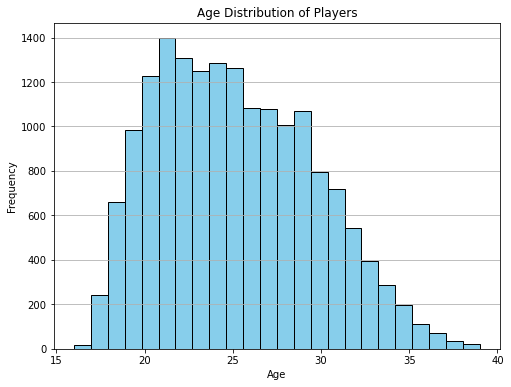

In [38]:
# Plot the Age Distribution using a histogram
plt.figure(figsize=(8, 6))
plt.hist(data['age'], bins=24, edgecolor='black', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.title('Age Distribution of Players')
plt.show()

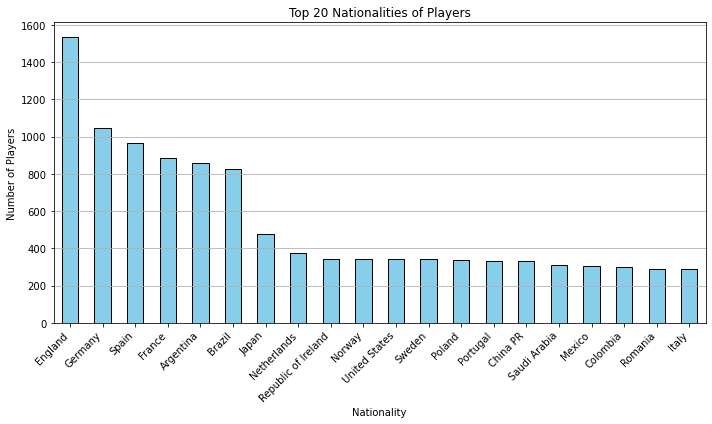

In [37]:
# Plot the Distribution of player nationalities
nationality_count = data['nationality_name'].value_counts()

# Select the top 15 nationalities for better visualization
top_nationalities = 20
top_nationalities_count = nationality_count.head(top_nationalities)

plt.figure(figsize=(10, 6))
top_nationalities_count.plot(kind='bar', edgecolor='black', color='skyblue')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.title(f'Top {top_nationalities} Nationalities of Players')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

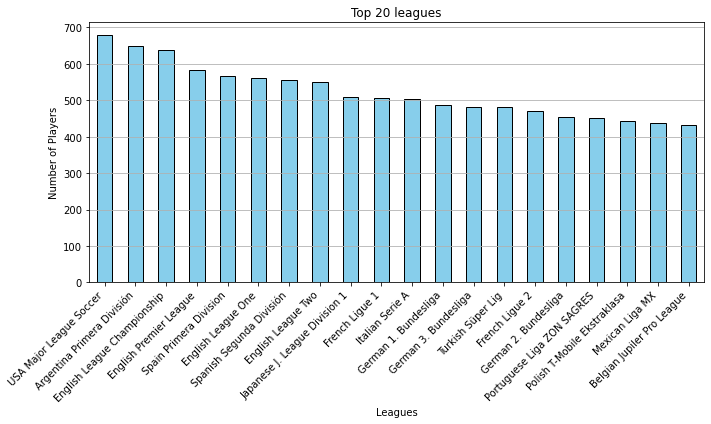

In [36]:
# Plot the Distribution of leagues
league_count = data['league_name'].value_counts()

# Select the top 20 leagues for better visualization
top_leagues = 20
top_leagues_count = league_count.head(top_leagues)

plt.figure(figsize=(10, 6))
top_leagues_count.plot(kind='bar', edgecolor='black', color='skyblue')
plt.xlabel('Leagues')
plt.ylabel('Number of Players')
plt.title(f'Top {top_leagues} leagues')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [33]:
# Print the Distribution of players by position
positions_count = data['position'].value_counts()
print(positions_count)

Midfielder    7009
Defender      6366
Forward       3666
Name: position, dtype: int64


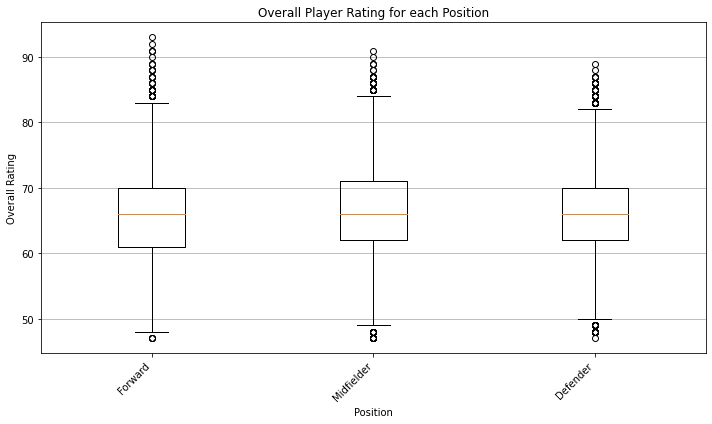

In [54]:
# Plot Overall Player Rating for each Position using a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(
   [data[data['position'] == position]['overall'] for position in data['position'].unique()], 
   labels=data['position'].unique()
)
plt.xlabel('Position')
plt.ylabel('Overall Rating')
plt.title('Overall Player Rating for each Position')
   
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()  # Optional: Adjust layout to prevent label overlapping
plt.show()


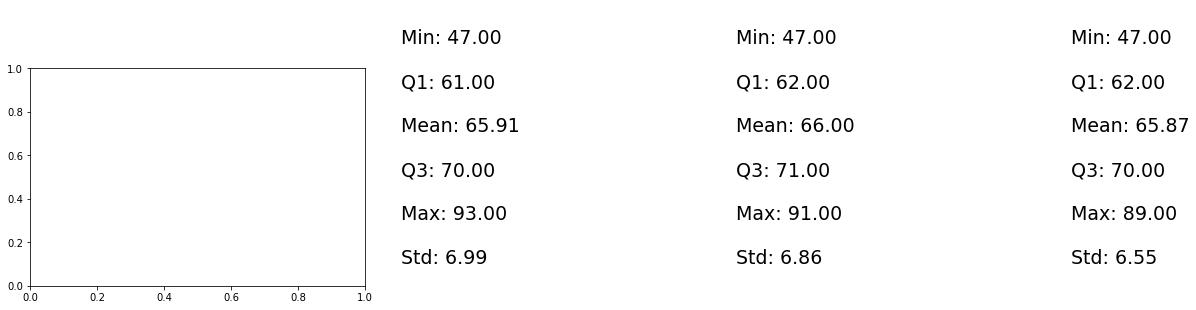

In [68]:
position_stats = data.groupby('position')['overall'].describe()

# Display basic descriptive stats for each position on the plot
for i, position in enumerate(data['position'].unique()):
   stats_str = f"""
      Min: {position_stats['min'][position]:.2f}\n
      Q1: {position_stats['25%'][position]:.2f}\n
      Mean: {position_stats['mean'][position]:.2f}\n
      Q3: {position_stats['75%'][position]:.2f}\n
      Max: {position_stats['max'][position]:.2f}\n
      Std: {position_stats['std'][position]:.2f}
   """

   # plt.text( stats_str, ha='center', va='center', fontsize=19)
   plt.text(i + 1, 0, stats_str, fontsize=19)
